In [16]:
import numpy as np

In [17]:
SFA_S=np.load("SFA_Skin.npy")
SFA_NS=np.load("SFA_NonSkin.npy")

In [18]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [19]:
def YCbCrTransform(x):
    #================= exponancial function ==================#
    exponancial=[[65.738, 129.057, 25.064],
                 [-37.945, -74.494, 112.439],
                 [112.439, -94.154, -18.285]]
    exponancial=np.matrix(exponancial)
    exponancial=(1/256)*exponancial
    
    A=[[16],[128],[128]]
    A=np.matrix(A)
    #=========================================================#
    x=np.matrix(x)
    x=np.transpose(x)
    Answer=A+exponancial*x
    Answer=np.array(Answer)
    Answer=Answer.tolist()
    Cb=Answer[1][0]
    Cr=Answer[2][0]
    
    return Cb,Cr

In [20]:
def Make_redemention1(x):
    before_result=[]
    for i in tqdm(range(x.shape[0])):    #x.shape[0]
        time.sleep(0.0000001)
        before_result3=[]
        before=x[i]
        Cb,Cr=YCbCrTransform(before)
        before_result3.append(before[0])
        before_result3.append(before[1])
        before_result3.append(before[2])
        before_result3.append(Cb)
        before_result3.append(Cr)
        before_result.append(before_result3)
    return before_result

In [21]:
AAA=Make_redemention1(SFA_S)

100%|██████████| 1615510/1615510 [03:02<00:00, 8871.70it/s]


In [22]:
AAA=np.array(AAA,dtype=np.uint8)
BBB=Make_redemention1(SFA_NS)
BBB=np.array(BBB,dtype=np.uint8)

100%|██████████| 969306/969306 [01:49<00:00, 8875.05it/s]


In [23]:
np.save('SFA_Skin_RGBCBCR.npy',AAA)
np.save('SFA_NSkin_RGBCBCR.npy',BBB)

In [24]:
img_YCrCb_value_X_s = []
img_YCrCb_value_Y_s = []
img_YCrCb_value_X_ns = []
img_YCrCb_value_Y_ns = []

In [25]:
for i in range(len(AAA)):
    X=AAA[i][3]
    Y=AAA[i][4]
    img_YCrCb_value_X_s.append(X)
    img_YCrCb_value_Y_s.append(Y)

In [26]:
for i in range(len(BBB)):
    X=BBB[i][3]
    Y=BBB[i][4]
    img_YCrCb_value_X_ns.append(X)
    img_YCrCb_value_Y_ns.append(Y)

<function matplotlib.pyplot.show(close=None, block=None)>

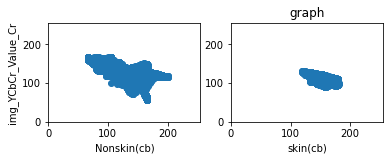

In [28]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.ylabel("img_YCbCr_Value_Cr")
plt.scatter(img_YCrCb_value_X_s,img_YCrCb_value_Y_s)
plt.xlabel("Nonskin(cb)")
plt.axis([0,255,0,255])
plt.subplot(222)
plt.scatter(img_YCrCb_value_X_ns,img_YCrCb_value_Y_ns)
plt.xlabel("skin(cb)")
plt.title('graph')
plt.axis([0,255,0,255])
plt.show